Notre projet est décomposé en 3 parties :

- <b>L'Exploration</b>, le Nettoyage (Exploratory Data Analysis (EDA)) et la Normalisation du Texte.
- <b>La Transformation</b> du texte et la création de features
- <b>La Classification</b> du Texte à l'aide du ML

# <font color = Green>Partie 1 : Exploratory Data Analysis</font>

Objectifs :
- Comprendre la forme et la structure de nos données
- Faire un premier netttoyage de nos données
- Avoir une première représentation de nos données
- Repérer des patterns dans nos données

## <font color = purple>1. Préléminaires</font>

### <font color = grey>1.1 Contexte</font>

Bibliothèque de prétraitement : nltk.
</br>nltk est simple mais un peu désuet. Il reste néanmoins très pertinent lors d'une première approche au NLP.

### <font color = grey>1.2 Librairies</font>

In [4]:
#Librairies classiques
import os, sys, time

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [5]:
#Contenu du repertoire
!tree

Folder PATH listing for volume OS
Volume serial number is 6A45-4B07
C:.
+---cleaned
�   +---.ipynb_checkpoints
+---source


### <font color = grey>1.3 Chargement des données</font>

In [6]:
#Chemin de notre fichier source
data = "./source/"
os.listdir(data)

['QueryResults.csv']

In [7]:
#Chargement du Dataframe
fn = data + 'QueryResults.csv'
df = pd.read_csv(fn)
df.head()

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
0,"Differences between declare, typeset and local...","<p>When typing variables in Bash, what is the ...",<bash><shell><variables><scope><declare>,4419704,57,25057,11,3
1,Dealing with PHP server and MySQL server in di...,<p>For those of us who use standard shared hos...,<php><mysql><datetime><date><timezone>,18449,12,7651,11,5
2,Difference between async/await and ES6 yield w...,<p>I was just reading this fantastic article «...,<javascript><node.js><ecmascript-6><generator>...,36196608,97,56536,31,8
3,Loading System.ServiceModel configuration sect...,"<p>Using C# .NET 3.5 and WCF, I'm trying to wr...",<c#><.net><xml><wcf><configurationmanager>,19589,64,59775,16,5
4,XML Serialization and Inherited Types,"<p>Following on from my <a href=""https://stack...",<c#><xml><inheritance><serialization><xml-seri...,20084,86,56971,42,7


### <font color = grey>1.4 Filtre / échantillonage</font>

Suite a des contrainte machine et de pertinence des thread, nous ne conservons que les thread ayant plus de 5 de score.
</br>Il s'agit d'un choix arbitraire donc contestable.

In [8]:
df = df[df['Score']>5]

-----

## <font color = purple>2. Premier apperçu des données</font>

### <font color = grey>2.1 Affichage du dataframe</font>

In [9]:
#5 premiers éléments
df.head(5)

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
0,"Differences between declare, typeset and local...","<p>When typing variables in Bash, what is the ...",<bash><shell><variables><scope><declare>,4419704,57,25057,11,3
1,Dealing with PHP server and MySQL server in di...,<p>For those of us who use standard shared hos...,<php><mysql><datetime><date><timezone>,18449,12,7651,11,5
2,Difference between async/await and ES6 yield w...,<p>I was just reading this fantastic article «...,<javascript><node.js><ecmascript-6><generator>...,36196608,97,56536,31,8
3,Loading System.ServiceModel configuration sect...,"<p>Using C# .NET 3.5 and WCF, I'm trying to wr...",<c#><.net><xml><wcf><configurationmanager>,19589,64,59775,16,5
4,XML Serialization and Inherited Types,"<p>Following on from my <a href=""https://stack...",<c#><xml><inheritance><serialization><xml-seri...,20084,86,56971,42,7


In [10]:
#5 derniers éléments
df.tail(5)

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
27650,ETL in Java Spring Batch vs Apache Spark Bench...,<p>I have been working with Apache Spark + Sca...,<spring><spring-boot><apache-spark><spring-bat...,53689531,20,11914,12,1
27651,Errors installing Composer on macOS (JIT compi...,<p>When I run <code>composer --version</code> ...,<php><macos><composer-php><jit><php-7.3>,53690624,63,34213,18,8
27652,Performant cartesian product (CROSS JOIN) with...,<blockquote>\n <p>The contents of this post w...,<python><pandas><numpy><dataframe><merge>,53699012,68,23298,24,5
27653,What is the spring-boot-configuration-processo...,<h1>Introduction</h1>\n\n<p>So I noticed the f...,<java><spring><maven><spring-boot><gradle>,53707080,59,53974,12,2
27654,Cannot add task 'wrapper' as a task with that ...,<p>When installing <strong>'react-native init ...,<android><reactjs><react-native><wrapper><expo>,53709282,141,97914,19,7


In [11]:
#5 individus au hasard (sample)
df.sample(5)

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
10800,how to set active class to nav menu from twitt...,<p>I'm new to the <strong>twitter bootstrap</s...,<javascript><jquery><css><twitter-bootstrap><m...,15082316,30,109738,13,13
10389,How to set up a PostgreSQL database in Django,<p>I'm new to Python and Django.</p>\n\n<p>I'm...,<python><django><postgresql><psycopg2><django-...,5394331,113,209721,65,14
15598,How to get the size of the current screen in WPF?,<p>I know I can get the size of the primary sc...,<c#><wpf><xaml><size><screen>,1927540,105,137134,15,15
1406,How to share a ManagedObjectContext when using...,<p>I have an iPhone application that has a Mai...,<iphone><cocoa-touch><core-data><uitabbarcontr...,2070565,14,12854,16,9
3254,UIButton title alignment and multiline support,<p>How do I set the title of a <code>UIButton<...,<iphone><ios><cocoa-touch><uikit><uibutton>,954589,68,45575,14,5


Suite à cette première analyse,
</br>nous remarquons des choses intéréssantes :
- la présence de balises html dans le body
- la présence de mots particulier, C# par exemple ou encore .NET
- la présence des caractères <> pour séparer les tags

### <font color = grey>2.2. Structure</font>

In [12]:
#Taille du dataframe
df.shape

(27655, 8)

In [13]:
#Type de données
df.dtypes

Title            object
Body             object
Tags             object
Id                int64
Score             int64
ViewCount         int64
FavoriteCount     int64
AnswerCount       int64
dtype: object

In [14]:
#Information du Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27655 entries, 0 to 27654
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Title          27655 non-null  object
 1   Body           27655 non-null  object
 2   Tags           27655 non-null  object
 3   Id             27655 non-null  int64 
 4   Score          27655 non-null  int64 
 5   ViewCount      27655 non-null  int64 
 6   FavoriteCount  27655 non-null  int64 
 7   AnswerCount    27655 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 1.9+ MB


In [15]:
#Nombre de colonne par type (Utile pour beaucoup de colonne)
df.dtypes.value_counts()

int64     5
object    3
dtype: int64

In [16]:
#nb de valeurs unique par colonne
df.nunique()

Title            27655
Body             27655
Tags             27183
Id               27655
Score             1080
ViewCount        25245
FavoriteCount      589
AnswerCount         77
dtype: int64

Nous avons 27655 individus, nous remarquons donc que :
- Tous les titres sont différents
- Tous les Body sont différents
- Un ID est attribué à chaque individu (clef primaire en SQL)

### <font color = grey>2.3 NaN et valeurs dupliquées</font>

In [17]:
#Nb de Nan par colonne
df.isna().sum().sort_values() 

Title            0
Body             0
Tags             0
Id               0
Score            0
ViewCount        0
FavoriteCount    0
AnswerCount      0
dtype: int64

In [18]:
#Ratio Nan par colonne
df.isna().mean().sort_values()

Title            0.0
Body             0.0
Tags             0.0
Id               0.0
Score            0.0
ViewCount        0.0
FavoriteCount    0.0
AnswerCount      0.0
dtype: float64

In [19]:
#Nombre d'individus dupliquée (i.e. toute les colonnes sont égales)
df.duplicated().sum()

0

In [20]:
#Nombre d'individus dupliquée par colonne
for col in df.columns:
    n = df.duplicated(subset = col).sum()
    print(f"col : {col} -> duplicated : {n}")

col : Title -> duplicated : 0
col : Body -> duplicated : 0
col : Tags -> duplicated : 472
col : Id -> duplicated : 0
col : Score -> duplicated : 26575
col : ViewCount -> duplicated : 2410
col : FavoriteCount -> duplicated : 27066
col : AnswerCount -> duplicated : 27578


On remarque qu'il y a <b>472 individus en doublons</b> au niveau des tags.
</br>Cela n'est en rien surpprenant. En effet, avoir 2 individus avec les même tags n'est pas incohérent au contraire.
</br>Néanmoins, il faudra traiter ces balises pour facilité les traitements futurs

In [21]:
#Affichage des lignes dupliquées pour "Tags"
idx = df.duplicated(subset = "Tags", keep = "first")
df.loc[idx, :].sort_values("Tags")

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
17511,Add Keypair to existing EC2 instance,<p>I was given <strong>AWS</strong> Console ac...,<amazon-web-services><authentication><ssh><ama...,3260739,266,245353,96,10
25456,How can I modify ripple color when using ?attr...,<p>I've seen some SO questions and they gave s...,<android><android-layout><android-5.0-lollipop...,33061050,127,74243,50,8
23241,Disable multi finger touch in my app,<p>My app uses one Activity to host several fr...,<android><android-layout><android-intent><andr...,12777435,22,26614,13,3
6037,gen already exists but is not a source folder,"<p>I am developing my Android project, After I...",<android><android-layout><android-intent><andr...,9532045,92,57225,22,15
27483,How to add .aar dependency in library module?,<p>I am having one <code>.aar</code> file of o...,<android><android-studio><gradle><android-grad...,34765190,36,30993,11,5
...,...,...,...,...,...,...,...,...
13683,How and/or why is merging in Git better than i...,<p>I've heard in a few places that one of the ...,<svn><git><version-control><mercurial><merge>,2471606,408,68728,267,7
26019,Example of delayed expansion in batch file,<p>Can someone give me an example of where a b...,<windows><batch-file><cmd><environment-variabl...,10558316,54,59855,12,5
27198,Where is the Write-Combining Buffer located? x86,<p>How is the Write-Combine buffer physically ...,<x86><intel><cpu-architecture><cpu-cache><amd-...,49959963,14,5053,12,3
19105,"xmlns, xmlns:xsi, xsi:schemaLocation, and targ...",<p>For the following XML fragment:</p>\n\n<pre...,<xml><xsd><xml-namespaces><xsd-validation><xml...,34202967,73,57493,28,2


### <font color = grey>2.4 Inspection des données</font>

In [22]:
# description des colonnes numériques
df.describe(include = np.number)

,Id,Score,ViewCount,FavoriteCount,AnswerCount
count,2.765500e+04,27655.000000,2.765500e+04,27655.000000,27655.000000
mean,1.672991e+07,113.756102,1.106085e+05,42.779534,7.140409
std,1.524737e+07,352.306308,2.443554e+05,146.674260,6.784792
min,4.000000e+00,6.000000,2.710000e+02,11.000000,1.000000
25%,4.181782e+06,29.000000,2.157400e+04,14.000000,3.000000
50%,1.200500e+07,51.000000,4.842300e+04,19.000000,5.000000
75%,2.590548e+07,99.000000,1.108880e+05,35.000000,9.000000
max,7.256872e+07,26510.000000,1.008203e+07,11616.000000,127.000000


Ces colonnes ne nous interessent pas.

In [23]:
#description des colonnes texte
df.describe(include = object)

,Title,Body,Tags
count,27655,27655,27655
unique,27655,27655,27183
top,"Differences between declare, typeset and local...","<p>When typing variables in Bash, what is the ...",<java><spring><jpa><spring-data><spring-data-jpa>
freq,1,1,19


Liste des colonnes <font color = green>conservées</font> pour la suite de notre projet :
- <b>Title</b> : Il s'agit de la question / du titre du topic
- <b>Body</b> : Il s'agit du contenu du topic, dans un premier temps nous ne l'utiliserons pas.
- <b>Tags</b> : Il s'agit de la valeur cible (Y)

Liste des colonnes <font color = red>non conservées</font> pour la suite de notre projet :
- <b>Id</b> : nous conservons les index 
- <b>Score</b> / <b>ViewCount</b> / <b>FavoriteCount</b> / <b>AnswerCount</b> : Ces colonnes ne nous sont d'aucune utilité dans la suggestion de Tags

-----

## <font color = Purple>3. Cleaning des Données</font>

### <font color = grey>3.1 Selection des colonnes</font>

In [24]:
cols = ["Title", "Body","Tags"]
df = df[cols]
df.head()

,Title,Body,Tags
0,"Differences between declare, typeset and local...","<p>When typing variables in Bash, what is the ...",<bash><shell><variables><scope><declare>
1,Dealing with PHP server and MySQL server in di...,<p>For those of us who use standard shared hos...,<php><mysql><datetime><date><timezone>
2,Difference between async/await and ES6 yield w...,<p>I was just reading this fantastic article «...,<javascript><node.js><ecmascript-6><generator>...
3,Loading System.ServiceModel configuration sect...,"<p>Using C# .NET 3.5 and WCF, I'm trying to wr...",<c#><.net><xml><wcf><configurationmanager>
4,XML Serialization and Inherited Types,"<p>Following on from my <a href=""https://stack...",<c#><xml><inheritance><serialization><xml-seri...


### <font color = grey>3.2. Suppression des Nan</font>

In [25]:
df.isna().mean()

Title    0.0
Body     0.0
Tags     0.0
dtype: float64

Pas de Nan ==> pas de suppression. 
</br>sinon, on utilise la fonction dropna()

### <font color = grey>3.3 Gestion des valeurs dupliquées</font>

In [26]:
for col in df.columns:
    n = df.duplicated(subset = col).sum()
    print(f"col : {col} -> duplicated : {n}")

col : Title -> duplicated : 0
col : Body -> duplicated : 0
col : Tags -> duplicated : 472


Pas d'action car les tags dupliquées sont "logique", sinon :

In [27]:
#Drop duplciate :
#df.drop_duplicates(subset = "COLONNE", inplace = True)

----

## <font color = purple>4. Exploration des Données</font>

### <font color = grey>4.1. La cible "Tags"</font>

In [28]:
#supression des <, >
df["Tags"] = df["Tags"].str.replace("><"," ")
df["Tags"] = df["Tags"].str.replace("<","")
df["Tags"] = df["Tags"].str.replace(">","")

In [29]:
df["Tags"].head(10)

0                   bash shell variables scope declare
1                     php mysql datetime date timezone
2    javascript node.js ecmascript-6 generator ecma...
3                 c# .net xml wcf configurationmanager
4    c# xml inheritance serialization xml-serializa...
5             mysql database performance innodb myisam
6              python mysql django django-models enums
7       sql database-design tags data-modeling tagging
8            c++ c include header-files c-preprocessor
9                       .net asp.net url uri authority
Name: Tags, dtype: object

In [30]:
df['Tags'] = df['Tags'].apply(lambda x: x.split())

In [31]:
df["Tags"].head(10)

0             [bash, shell, variables, scope, declare]
1               [php, mysql, datetime, date, timezone]
2    [javascript, node.js, ecmascript-6, generator,...
3           [c#, .net, xml, wcf, configurationmanager]
4    [c#, xml, inheritance, serialization, xml-seri...
5       [mysql, database, performance, innodb, myisam]
6        [python, mysql, django, django-models, enums]
7    [sql, database-design, tags, data-modeling, ta...
8      [c++, c, include, header-files, c-preprocessor]
9                 [.net, asp.net, url, uri, authority]
Name: Tags, dtype: object

In [32]:
all_tags = [item for sublist in df['Tags'].values for item in sublist]

In [33]:
#Nombre de Tags :
len(all_tags)

138275

In [34]:
#Nombre de Tags sans doublons :
my_set = set(all_tags)
unique_tags = list(my_set)
len(unique_tags)

12553

In [35]:
#On ne conserve que les 100 Tags les plus utilisés:
flat_list = [item for sublist in df['Tags'].values for item in sublist]

keywords = nltk.FreqDist(flat_list)

keywords = nltk.FreqDist(keywords)

frequencies_words = keywords.most_common(100)
tags_features = [word[0] for word in frequencies_words]

In [36]:
#Affichage des 100 tags conservés
tags_features

['python',
 'java',
 'javascript',
 'c#',
 'ios',
 'android',
 'c++',
 '.net',
 'iphone',
 'objective-c',
 'html',
 'jquery',
 'php',
 'c',
 'linux',
 'css',
 'node.js',
 'sql',
 'performance',
 'swift',
 'xcode',
 'asp.net',
 'spring',
 'windows',
 'asp.net-mvc',
 'mysql',
 'cocoa-touch',
 'json',
 'algorithm',
 'multithreading',
 'ruby-on-rails',
 'string',
 'database',
 'arrays',
 'macos',
 'git',
 'django',
 'bash',
 'pandas',
 'sql-server',
 'c++11',
 'ruby',
 'image',
 'numpy',
 'python-3.x',
 'wpf',
 'ajax',
 'r',
 'shell',
 'unit-testing',
 'security',
 'reactjs',
 'hibernate',
 'rest',
 'visual-studio',
 'machine-learning',
 'http',
 'angularjs',
 'jpa',
 'postgresql',
 'gcc',
 'google-chrome',
 'dataframe',
 'entity-framework',
 'ipad',
 'eclipse',
 'authentication',
 'unix',
 'file',
 'asynchronous',
 'optimization',
 'xml',
 'list',
 'oop',
 'image-processing',
 'ssl',
 'debugging',
 'spring-boot',
 'cocoa',
 'ubuntu',
 'spring-mvc',
 'class',
 'android-studio',
 'datetime'

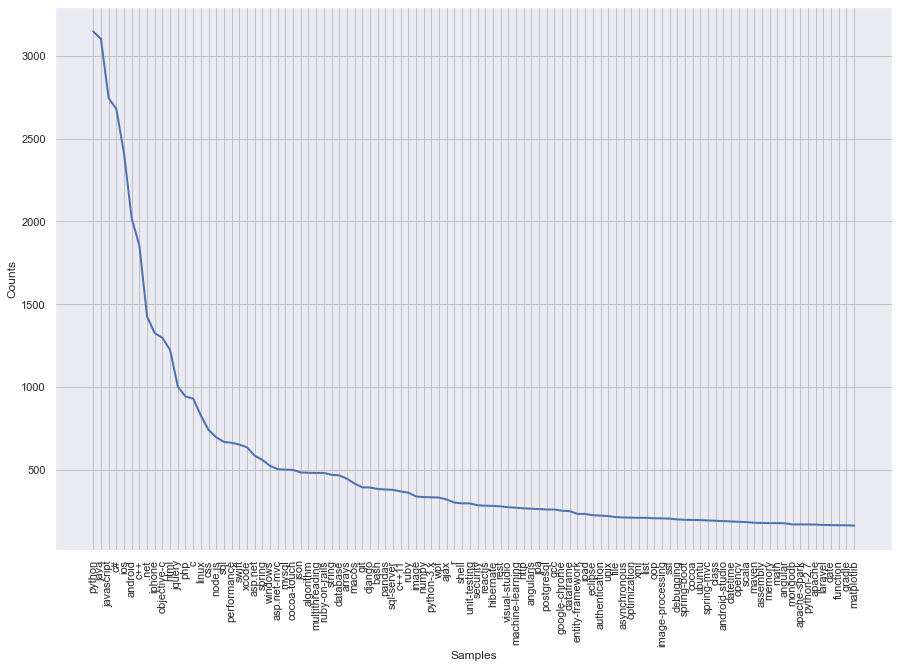

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [37]:
#Subplot des 100 tags :
fig, ax = plt.subplots(figsize=(15, 10))
keywords.plot(100, cumulative=False)

In [38]:
def use_wordcloud(corpus):
    wordcloud = WordCloud(background_color = "white",
                     stopwords = [],
                     max_words = 50).generate(" ".join(corpus))
    plt.figure(figsize=(10,10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

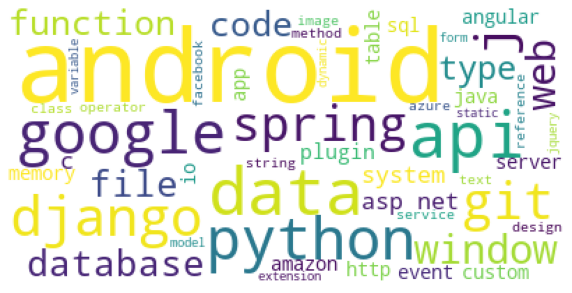

In [39]:
use_wordcloud(keywords)

In [40]:
#Définition d'une fonction d'extraction des 100 tags les plus fréquents d'un corpus
def most_common(tags):
    tags_filtered = []
    for i in range(0, len(tags)):
        if tags[i] in tags_features:
            tags_filtered.append(tags[i])
    return tags_filtered

In [41]:
#On applique notre fonction a df["Tags"]
df['Tags'] = df['Tags'].apply(lambda x: most_common(x))

#On remplace les cellule sans tag par des Nan (faciliter le traitement)
df['Tags'] = df['Tags'].apply(lambda x: x if len(x)>0 else None)

In [42]:
df.shape

(27655, 3)

In [43]:
#On supprimme les individu sans Tags
df.dropna(subset=['Tags'], inplace=True)

In [44]:
df.shape

(26081, 3)

In [45]:
print("Nous avons supprimmé " + str(27655 - 26081) + " individus")

Nous avons supprimmé 1574 individus


### <font color = grey>4.2. body</font>

In [46]:
df["Body"].head(10)

0    <p>When typing variables in Bash, what is the ...
1    <p>For those of us who use standard shared hos...
2    <p>I was just reading this fantastic article «...
3    <p>Using C# .NET 3.5 and WCF, I'm trying to wr...
4    <p>Following on from my <a href="https://stack...
5    <p>I'm working on a projects which involves a ...
6    <p>How do I go about specifying and using an E...
7    <p>I've heard of a few ways to implement taggi...
8    <p>What is the difference between using angle ...
9    <p>Is there a simple way in .NET to quickly ge...
Name: Body, dtype: object

In [47]:
from bs4 import BeautifulSoup

In [48]:
#supression des balises html
df['Body'] = df['Body'].apply(lambda x: BeautifulSoup(x).get_text()) 

In [49]:
df["Body"].head(10)

0    When typing variables in Bash, what is the dif...
1    For those of us who use standard shared hostin...
2    I was just reading this fantastic article «Gen...
3    Using C# .NET 3.5 and WCF, I'm trying to write...
4    Following on from my previous question I have ...
5    I'm working on a projects which involves a lot...
6    How do I go about specifying and using an ENUM...
7    I've heard of a few ways to implement tagging;...
8    What is the difference between using angle bra...
9    Is there a simple way in .NET to quickly get t...
Name: Body, dtype: object

### <font color = grey>4.3. Title</font>

In [50]:
#Longueur de chaque Document :
df.Title.apply(lambda i : len(i))

0         63
1         64
2         60
3         76
4         37
        ... 
27650     53
27651     60
27652     53
27653    130
27654     65
Name: Title, Length: 26081, dtype: int64

c:\Users\Anthony\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Title'>

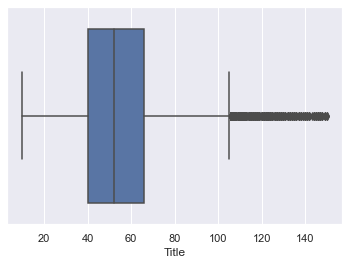

In [51]:
#Affichage avec un boxplot :
tmp = df.Title.str.len()
sns.boxplot(tmp)

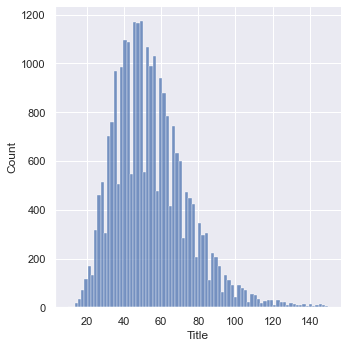

In [52]:
#Affichage sous forme de Displot :
sns.displot(tmp)

In [53]:
#Nous Stockons les infos sur la longueur du titre dans la colonne _len_title :
df["_len_txt"] = tmp

### <font color = grey>4.4. Analyse Multi-variée</font>

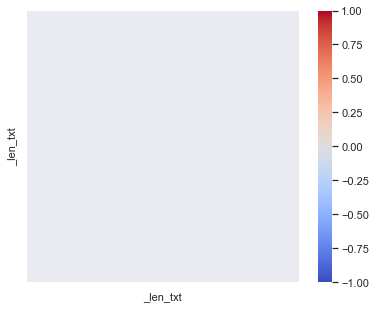

In [54]:
# Matrice de corrélation
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

fog, ax = plt.subplots(1, 1, figsize = (7, 5))
ax = sns.heatmap(corr, mask = mask, vmin = -1, vmax = 1, cmap = "coolwarm", annot = True, fmt = ".2f", square = True)

Non utile dans notre cas car nous n'avons pas de variable Numérique !

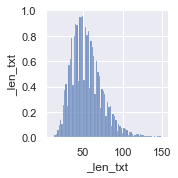

In [55]:
sns.pairplot(df)

Non utile dans notre cas car nous n'avons pas de variable Numérique

In [56]:
#Affichages des 10 plus court titres
df.sort_values("_len_txt").head(5)

,Title,Body,Tags,_len_txt
514,TFS vs SVN,I am about to start a project (.NET) and need ...,[.net],10
3215,.Net Encryption,What I would like to know is the definite appr...,[.net],15
1292,Is assert evil?,The Go language creators write:\n\nGo doesn't ...,"[c++, c]",15
5787,Spring vs Jboss,What are the advantages and disadvantages for ...,[spring],15
14563,Monitor vs lock,When is it appropriate to use either the Monit...,"[c#, .net, multithreading]",15


In [57]:
#Affichages des 10 plus long titre
df.sort_values("_len_txt").tail(5)

,Title,Body,Tags,_len_txt
4344,InvalidArgumentException: Message: invalid arg...,When I am trying to use --user-data-dir for th...,"[python, google-chrome]",149
4687,"XCode getting ""target specifies product type '...","When running my project in XCode, my tests giv...","[ios, objective-c, xcode, unit-testing]",149
19066,MediaSessionCompat:Targeting S+ (version 31 an...,I'm trying to update my application to Android...,"[java, android, android-studio]",149
24888,This app is not authorized to use Firebase Aut...,"Firebase auth was working fine, the debug buil...","[java, android, android-studio]",150
27551,Selenium: WebDriverException:Chrome failed to ...,Recently I switched computers and since then I...,"[python, google-chrome]",150


Nous pouvons nous séparer de la colonne "len_txt" qui a été utile pour l'analyse.

In [58]:
df.drop(columns = "_len_txt", inplace = True)
df.head()

,Title,Body,Tags
0,"Differences between declare, typeset and local...","When typing variables in Bash, what is the dif...","[bash, shell]"
1,Dealing with PHP server and MySQL server in di...,For those of us who use standard shared hostin...,"[php, mysql, datetime, date]"
2,Difference between async/await and ES6 yield w...,I was just reading this fantastic article «Gen...,"[javascript, node.js]"
3,Loading System.ServiceModel configuration sect...,"Using C# .NET 3.5 and WCF, I'm trying to write...","[c#, .net, xml]"
4,XML Serialization and Inherited Types,Following on from my previous question I have ...,"[c#, xml]"


In [59]:
#Enregistrement en csv :
df.to_csv("cleaned/df_cleaned.csv", index = False)

### <font color = grey>4.5. Exploration du Corpus et des Documents</font>

Création de la fonction "Print N documents au hasard"

In [60]:
def print_sample(sub_df, n_samp = 10) :
    """Visualisation n_samp documents du Corpus"""
    
    samp = sub_df.sample(n_samp)
    
    for idx, ser in samp.iterrows() :
        print("Title :" + ser["Title"])
        print("Tags :", ser["Tags"])
        print("Body :" + ser["Body"] + "..." + "\n\n")

In [61]:
print_sample(df, n_samp = 2)

Title :Directory-tree listing in Python
Tags : ['python', 'file']
Body :How do I get a list of all files (and directories) in a given directory in Python?
...


Title :Not able to use systemd on ubuntu docker container
Tags : ['ubuntu']
Body :Problem
It seems systemd is not active or available in Ubuntu Docker containers.
Setup
I'm running Docker containers from the ubuntu:16.04 and ubuntu:16.10 images.
Tests
If I execute:
systemctl status ssh in the 16,04 container
the result is the error Failed to connect to bus: No such file or directory
In the 16.10 container the error is: bash: systemctl: command not found.
If I do which systemctl systemctl is found in the 16.04 container but not in the 16.10 container.
I have spotted that /lib/systemd exists.
I have tried installing systemd with:
apt-get install systemd libpam-systemd systemd-ui
Then which systemctl finds systemctl in 16.10
but systemctl status ssh still gives the error Failed to connect to bus: No such file or directory
Question

--------
--------

# <font color = green>Partie 2 : Text Processing</font>

## <font color = purple>1. Préliminaires</font>

### <font color = grey>1.1. Contexte</font>

L'objectif de cette partie est :
- d'Explorer les principales transformations
- d'Analyser le corpus
- d'Essayer différents transofrmations
- de Réduire la dimensionnalité de nos données (réduction du nb de tokens sur notre corpus)

Attention : Ce notebook présente l'ensemble des pistes de recherche / essais.
Ainsi, vous pouvez ignorer les parties _____ qui détails l'ensemble des teste nous amenans à l'étape _____

### <font color = grey>1.2. Librairies</font>

In [62]:
# builtin :
import os, sys, time, random

# data :
import pandas as pd
import numpy as np

# NLP :
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize, wordpunct_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer


# Vizualisation :
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image #Pillow

### <font color = grey>1.3. Librairies externes et Options</font>

Afin d'utiliser certaines fonctionalitées nltk il faut télécharger des librairies externes (Asset).
</br>ex: "stopwords" contient une liste des stop words anglais.

In [63]:
#téléchargement :

nltk.download("omw-1.4")
nltk.download("wordnet")
nltk.download("stopwords")
nltk.download("words")

[nltk_data] Downloading package omw-1.4 to C:\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to C:\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to C:\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

### <font color = grey>1.4. Chargement des données</font>

In [64]:
# chemin d'accès au fichier :
data = "./cleaned/"
os.listdir(data)

['.ipynb_checkpoints',
 'df_cleaned.csv',
 'final_df.csv',
 'min_10_words.csv',
 'min_5_words.csv',
 'tokens_body_list.csv',
 'tokens_list.csv',
 'tokens_title_list.csv',
 'unique_words.csv']

In [65]:
# Chargement du dataframe :
fn = data + "df_cleaned.csv"
df = pd.read_csv(fn)
df.head()

,Title,Body,Tags
0,"Differences between declare, typeset and local...","When typing variables in Bash, what is the dif...","['bash', 'shell']"
1,Dealing with PHP server and MySQL server in di...,For those of us who use standard shared hostin...,"['php', 'mysql', 'datetime', 'date']"
2,Difference between async/await and ES6 yield w...,I was just reading this fantastic article «Gen...,"['javascript', 'node.js']"
3,Loading System.ServiceModel configuration sect...,"Using C# .NET 3.5 and WCF, I'm trying to write...","['c#', '.net', 'xml']"
4,XML Serialization and Inherited Types,Following on from my previous question I have ...,"['c#', 'xml']"


In [66]:
#Taille du dataframe
df.shape

(26081, 3)

In [67]:
#En cas de problème de perf, creation du sample
# df = df.sample(frac = 0.3)

## <font color = purple>2. Processing</font>

In [68]:
import re
from nltk.tokenize import ToktokTokenizer
from string import punctuation

### <font color = grey>2.1. RegExp</font>

In [69]:
#Déinition de la fonction clean_text afin de passer des expressions Régulières :
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub(r"\'\n", " ", text)
    text = re.sub(r"\'\xa0", " ", text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

### <font color = grey>2.2. Tokenization & punctuation</font>

In [70]:
token=ToktokTokenizer()

In [71]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [72]:
punct = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [73]:
def strip_list_noempty(mylist):
    newlist = (item.strip() if hasattr(item, 'strip') else item for item in mylist)
    return [item for item in newlist if item != '']

In [74]:
#Permet de n'enlever que la ponctuation "unitaire" , i.e. ne filtre pas les mots comme c#, .net, c++ etc.
def clean_punct(text): 
    words=token.tokenize(text)
    punctuation_filtered = []
    regex = re.compile('[%s]' % re.escape(punct))
    remove_punctuation = str.maketrans(' ', ' ', punct)
    for w in words:
        if w in tags_features:
            punctuation_filtered.append(w)
        else:
            punctuation_filtered.append(regex.sub('', w))
  
    filtered_list = strip_list_noempty(punctuation_filtered)
        
    return ' '.join(map(str, filtered_list))

### <font color = grey>2.3. Lemmatization</font>

In [75]:
lemma=WordNetLemmatizer()
stop_words = set(stopwords.words("english")) #Beosin de télécharger le dictionnaire externe nltk

In [76]:
def lemitizeWords(text):
    words=token.tokenize(text)
    listLemma=[]
    for w in words:
        x=lemma.lemmatize(w, pos="v")
        listLemma.append(x)
    return ' '.join(map(str, listLemma))

### <font color = grey>2.4. Stop Words</font>

In [77]:
def stopWordsRemove(text):
    
    stop_words = set(stopwords.words("english"))
    
    words=token.tokenize(text) #Essentiel de tokenizer les stop words pour la correspondance
    
    filtered = [w for w in words if not w in stop_words]
    
    return ' '.join(map(str, filtered))

### <font color = grey>2.5. Application des fonctions</font>

Sur Body :

In [78]:
df["Body"].head(5)

0    When typing variables in Bash, what is the dif...
1    For those of us who use standard shared hostin...
2    I was just reading this fantastic article «Gen...
3    Using C# .NET 3.5 and WCF, I'm trying to write...
4    Following on from my previous question I have ...
Name: Body, dtype: object

In [79]:
df['Body'] = df['Body'].apply(lambda x: clean_text(x))
df['Body'] = df['Body'].apply(lambda x: clean_punct(x))
df['Body'] = df['Body'].apply(lambda x: lemitizeWords(x)) 
df['Body'] = df['Body'].apply(lambda x: stopWordsRemove(x))

In [80]:
df["Body"].head(5)

0    type variables bash difference declare typeset...
1    us use standard share host package godaddy net...
2    read fantastic article «generators » clearly h...
3    use c# .net 35 wcf try write wcf configuration...
4    follow previous question work get object model...
Name: Body, dtype: object

Sur Title :

In [81]:
df["Title"].head(5)

0    Differences between declare, typeset and local...
1    Dealing with PHP server and MySQL server in di...
2    Difference between async/await and ES6 yield w...
3    Loading System.ServiceModel configuration sect...
4                XML Serialization and Inherited Types
Name: Title, dtype: object

In [82]:
df['Title'] = df['Title'].apply(lambda x: clean_text(x))
df['Title'] = df['Title'].apply(lambda x: clean_punct(x))
df['Title'] = df['Title'].apply(lambda x: lemitizeWords(x)) 
df['Title'] = df['Title'].apply(lambda x: stopWordsRemove(x))

In [83]:
df["Title"].head(5)

0      differences declare typeset local variable bash
1     deal php server mysql server different time zone
2           difference asyncawait es6 yield generators
3    load systemservicemodel configuration section ...
4                       xml serialization inherit type
Name: Title, dtype: object

### <font color = grey>2.6. Visualisation</font>

In [84]:
def plot_20_most_frequent_tokens(columns):
    raw_corpus = "".join(columns.values)
    words=token.tokenize(raw_corpus)
    use_wordcloud(words)
    frequency = pd.Series(words).value_counts()
    plt.figure(figsize=(10,6))
    barplot = sns.barplot(x=frequency.head(20).values, y=frequency.head(20).index)
    

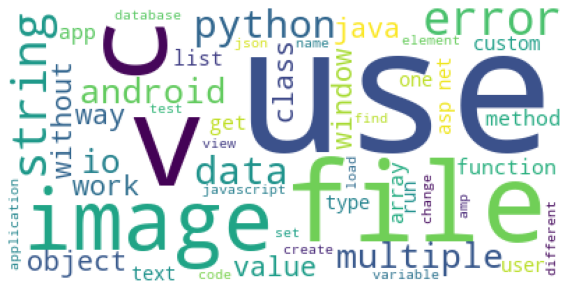

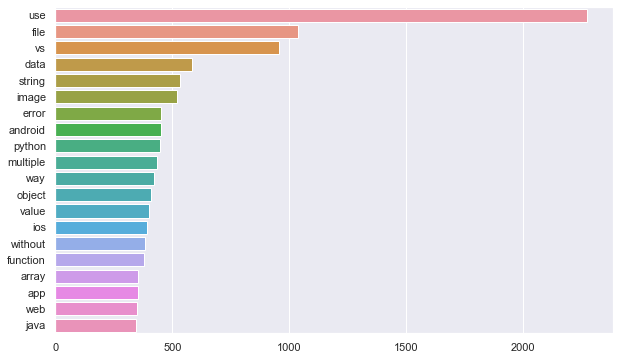

In [85]:
plot_20_most_frequent_tokens(df["Title"])

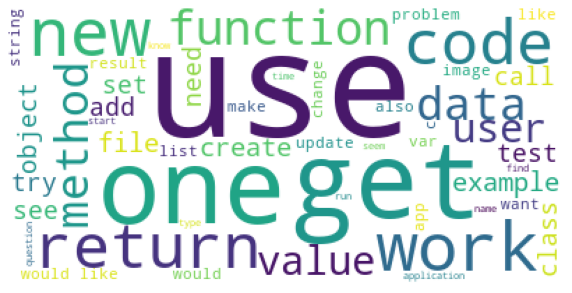

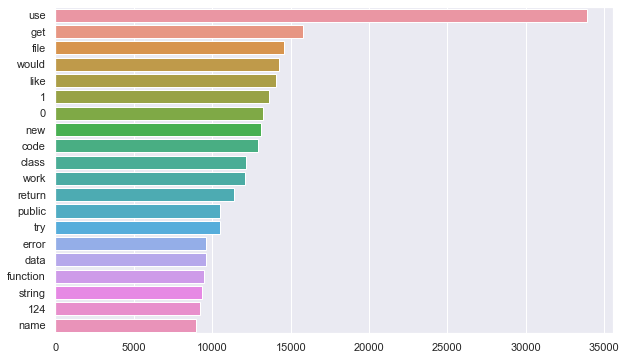

In [86]:
plot_20_most_frequent_tokens(df["Body"])

- Ajouter les caractère only (pas de chiffre)
- Ajouter la suppression des useless word style "use"
- Ajouter la suppression des mots présent moins de 5 fois.


# <font color = green>Partie 3 : Features Extraction</font>

## <font color = purple>1. Bag of words</font>

In [164]:
# Model
from sklearn.feature_extraction.text import CountVectorizer #pour le bag of word et n-grams

In [165]:
#Initialize
CountVec = CountVectorizer(ngram_range=(1,1),
                                       analyzer = 'word', #AJOUTER LES COMMENTAIRES !
                                       min_df=0.0,
                                       max_df = 1.0,
                                       strip_accents = None,
                                       encoding = 'utf-8', 
                                       preprocessor=None,
                                       token_pattern=r"(?u)\S\S+",
                                       max_features=1000)

#transform
X_bow = CountVec.fit_transform(df["Title"])

#create dataframe
df_X_bow=pd.DataFrame(X_bow.toarray(),columns=CountVec.get_feature_names_out())

In [166]:
#affichage
df_X_bow.sample(10)

,.net,10,11,124,20,2008,2015,2d,30,32bit,...,write,wrong,x86,x8664,xcode,xml,youtube,zero,zip,zoom
3676,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13918,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
838,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10181,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22385,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17388,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18100,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15850,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15310,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
10939,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [167]:
#Avec les bigram
#Initialize
CountVec = CountVectorizer(ngram_range=(2,2),
                                       analyzer = 'word',
                                       min_df=0.0,
                                       max_df = 1.0,
                                       strip_accents = None,
                                       encoding = 'utf-8', 
                                       preprocessor=None,
                                       token_pattern=r"(?u)\S\S+",
                                       max_features=1000) # to use bigrams ngram_range=(2,2)

#transform
X_bigram = CountVec.fit_transform(df["Title"])

#create dataframe
df_X_bigram=pd.DataFrame(X_bigram.toarray(),columns=CountVec.get_feature_names_out())

In [168]:
df_X_bigram.sample(10)

,.net 40,.net core,.net framework,.net mvc,124 124,2d array,3rd party,64 bite,abstract class,access control,...,wpf datagrid,wpf mvvm,write file,x509 certificate,xcode ios,xcode project,xib file,xml file,youtube video,zip file
25029,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19797,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19687,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23718,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3208,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5175,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23339,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14230,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18271,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25792,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## <font color = purple>2. TF-IDF</font>

In [147]:
tfidf = TfidfVectorizer(analyzer = 'word',
                                       min_df=0.0,
                                       max_df = 1.0,
                                       strip_accents = None,
                                       encoding = 'utf-8', 
                                       preprocessor=None,
                                       token_pattern=r"(?u)\S\S+",
                                       max_features=1000)

In [148]:
X_tfidf = tfidf.fit_transform(df["Title"])

In [149]:
#create dataframe
df_X_tfidf=pd.DataFrame(X_tfidf.toarray(),columns=tfidf.get_feature_names_out())

In [150]:
df_X_tfidf.head(10)

,.net,10,11,124,20,2008,2015,2d,30,32bit,...,write,wrong,x86,x8664,xcode,xml,youtube,zero,zip,zoom
0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.564205,0.0,0.0,0.0,0.0
5,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
6,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
7,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
8,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9,0.37799,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


## <font color = purple>3. Word2Vec et Doc2Vec</font>

## <font color = purple>4. USE</font>

## <font color = purple>5. BERT</font>

# <font color = green>Partie 4 : Machine Learning</font>

## <font color = purple>1. LDA</font>

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer #pour le tf idf
from sklearn.decomposition import LatentDirichletAllocation #pour la lda
from sklearn.model_selection import train_test_split

In [88]:
# Sampling dataset
vectorizer_X = TfidfVectorizer(analyzer='word', min_df=0.0, max_df = 1.0, 
                                   strip_accents = None, encoding = 'utf-8', 
                                   preprocessor=None, 
                                   token_pattern=r"(?u)\S\S+", # Need to repeat token pattern
                                   max_features=1000)

In [91]:
# 80/20 split
X_lda_train, X_lda_test, y_lda_train, y_lda_test = train_test_split(
    df['Body'], df['Tags'], test_size=0.2,train_size=0.8, random_state=0)

In [92]:
# TF-IDF matrices
X_tfidf_train = vectorizer_X.fit_transform(X_lda_train)
X_tfidf_test = vectorizer_X.transform(X_lda_test)

- Nous allons maintenant entrainer différents modèle LDA.
- Chacun de ces modèles aura un nb de topics différents.
- Nous évaluerons les différent modèles à l'aide du perplexity score :

![title](perplexity_score.png)

In [94]:
def lda(vectorizer, data_train, data_test):

    ''' Showing the perplexity score for several LDA models with different values
    for n_components parameter, and printing the top words for the best LDA model
    (the one with the lowest perplexity)
    Parameters:
    vectorizer: TF-IDF convertizer                                              
    data_train: data to fit the model with
    data_test: data to test
    '''

    best_perplexity = np.inf
    best_lda = 0
    perplexity_list = []
    n_topics_list = []
    print("Extracting term frequency features for LDA...")

    for n_topics in np.linspace(10, 50, 5, dtype='int'):
        lda_model = LatentDirichletAllocation(n_components=n_topics, max_iter=5,
                                        learning_method='online',
                                        learning_offset=50.,
                                        random_state=0).fit(data_train)
        n_topics_list.append(n_topics)
        perplexity = lda_model.perplexity(data_test)
        perplexity_list.append(perplexity)

        # Perplexity is defined as exp(-1. * log-likelihood per word)
        # Perplexity: The smaller the better
        if perplexity <= best_perplexity:
            best_perplexity = perplexity
            best_lda = lda_model
                                
    plt.title("Evolution of perplexity score depending on number of topics")
    plt.xlabel("Number of topics")
    plt.ylabel("Perplexity")
    plt.plot(n_topics_list, perplexity_list)
    plt.show()

Extracting term frequency features for LDA...


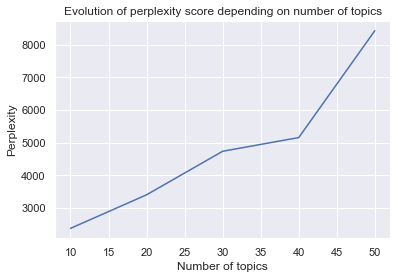

In [95]:
lda(vectorizer_X, X_tfidf_train, X_tfidf_test)

Le perplexity score le plus bas est obtenu avec 10 topics !

In [97]:
best_lda = LatentDirichletAllocation(n_components=10, max_iter=5,
                                        learning_method='online',
                                        learning_offset=50.,
                                        random_state=0).fit(X_tfidf_train)

In [102]:
def Recommend_tags_lda(text, X_train):
    
    ''' Recomendation system for stackoverflow posts based on a lda model, 
    it returns up to 5 tags.
    Parameters:
    text: the stackoverflow post of user
    X_train: data to fit the model with
    '''

    text = clean_text(text)
    text = clean_punct(text)
    text = stopWordsRemove(text)
    text = lemitizeWords(text)
    n_topics = 10
    threshold = 0.010
    list_scores = []
    list_words = []
    used = set()

    vectorizer_text = TfidfVectorizer(analyzer='word', min_df=0.0, max_df = 1.0, 
                                    strip_accents = None, encoding = 'utf-8', 
                                    preprocessor=None, 
                                    token_pattern=r"(?u)\S\S+", # Need to repeat token pattern
                                    max_features=1000)
    vectorizer_text.fit(X_train)
    text_tfidf = vectorizer_text.transform([text])

    lda_model = LatentDirichletAllocation(n_components=n_topics, max_iter=5,
                                        learning_method='online',
                                        learning_offset=50.,
                                        random_state=0).fit(X_tfidf_train)
    text_projection = lda_model.transform(text_tfidf)
    feature_names = vectorizer_text.get_feature_names()
    lda_components = lda_model.components_ / lda_model.components_.sum(axis=1)[:, np.newaxis] # normalization

    for topic in range(n_topics):
        topic_score = text_projection[0][topic]

        for (word_idx, word_score) in zip(lda_components[topic].argsort()[:-5:-1], sorted(lda_components[topic])[:-5:-1]):
            score = topic_score*word_score

            if score >= threshold:
                list_scores.append(score)
                list_words.append(feature_names[word_idx])
                used.add(feature_names[word_idx])

    results = [tag for (y,tag) in sorted(zip(list_scores,list_words), key=lambda pair: pair[0], reverse=True)]
    unique_results = [x for x in results if x not in used] # get only unique tags
    tags = " ".join(results[:5])

    return tags

In [328]:
text = input('Ask a question: ')
tags = Recommend_tags_lda(text, X_lda_train)
print('Recommended tags are:', tags)

Recommended tags are: 


In [117]:
def Recommend_tags_lda_test(X_tfidf_test, X_train):
    
    ''' Recomendation system for stackoverflow posts based on a lda model, 
    it returns up to 5 tags.

    Parameters:

    X_tfidf_test: the stackoverflow posts after TF-IDF transformation
    X_train: data to fit the model with
    '''

    df_tags_test_lda = pd.DataFrame(index=[i for i in range(X_tfidf_test.shape[0])], 
             columns=['0.010', '0.011', '0.012', '0.013'])
    corpus = X_tfidf_test
    n_topics = 10

    vectorizer_text = TfidfVectorizer(analyzer='word', min_df=0.0, max_df = 1.0, 
                                    strip_accents = None, encoding = 'utf-8', 
                                    preprocessor=None, 
                                    token_pattern=r"(?u)\S\S+", # Need to repeat token pattern
                                    max_features=1000)
    X_tfidf_train = vectorizer_text.fit_transform(X_train)
    lda_model = LatentDirichletAllocation(n_components=n_topics, max_iter=5,
                                        learning_method='online',
                                        learning_offset=50.,
                                        random_state=0).fit(X_tfidf_train)
    corpus_projection = lda_model.transform(corpus)
    
    feature_names = vectorizer_text.get_feature_names()
    lda_components = lda_model.components_ / lda_model.components_.sum(axis=1)[:, np.newaxis] # normalization

    for column, threshold in zip(range(4), [0.010, 0.011, 0.012, 0.013]): #  threshold to exceed to be considered as a relevant tag

        for text in range(corpus.shape[0]):
            list_scores = []
            list_words = []

            for topic in range(n_topics):
                topic_score = corpus_projection[text][topic]

                for (word_idx, word_score) in zip(lda_components[topic].argsort()[:-5:-1], sorted(lda_components[topic])[:-5:-1]):
                    score = topic_score*word_score

                    if score >= threshold:
                        list_scores.append(score)
                        list_words.append(feature_names[word_idx])

            results = [tag for (y,tag) in sorted(zip(list_scores,list_words), 
                                                 key=lambda pair: pair[0], reverse=True)]
            df_tags_test_lda.iloc[text, column] = results[:5] #maximum five tags

    return df_tags_test_lda

In [118]:
Recommend_tags_lda_test(X_tfidf_test, X_lda_train)

c:\Users\Anthony\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0.010,0.011,0.012,0.013
0,"[public, class, new]",[public],[public],[public]
1,"[image, div]",[image],[image],[image]
2,"[file, run, error]",[file],[file],[file]
3,"[page, html, javascript, jquery]","[page, html, javascript]","[page, html]","[page, html]"
4,[],[],[],[]
...,...,...,...,...
5212,"[image, view]","[image, view]","[image, view]",[image]
5213,[int],[],[],[]
5214,"[image, view]",[image],[image],[image]
5215,[],[],[],[]


In [ ]:
#no_topics = 20

In [ ]:
#text = df['Body']

In [ ]:
#vectorizer_train = TfidfVectorizer(analyzer = 'word',
                                       min_df=0.0,
                                       max_df = 1.0,
                                       strip_accents = None,
                                       encoding = 'utf-8', 
                                       preprocessor=None,
                                       token_pattern=r"(?u)\S\S+", # Need to repeat token pattern
                                       max_features=1000)

In [ ]:
#TF_IDF_matrix = vectorizer_train.fit_transform(text)

In [ ]:
#lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50,random_state=11).fit(TF_IDF_matrix)

In [ ]:
""""def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("--------------------------------------------")
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print("--------------------------------------------")""""

SyntaxError: EOL while scanning string literal (2419753852.py, line 7)

In [ ]:
#display_topics(lda, vectorizer_train.get_feature_names(), 10)

--------------------------------------------
Topic 0:
spring bean hibernate dependency transaction property configuration inject configure xmlns
--------------------------------------------
--------------------------------------------
Topic 1:
use request user server app web api application send would
--------------------------------------------
--------------------------------------------
Topic 2:
attribute eandroidruntime mark 22 gradle canvas audio 17 action native
--------------------------------------------
--------------------------------------------
Topic 3:
date convert format string day parse time 09 java second
--------------------------------------------
--------------------------------------------
Topic 4:
git commit branch merge repository push github master pull head
--------------------------------------------
--------------------------------------------
Topic 5:
std int char const struct printf include cout unsigned double
--------------------------------------------
--

c:\Users\Anthony\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Pas mal du tout les topics on du sens !

## <font color = purple>2. ML Preparation</font>

In [151]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

In [240]:
y = df['Tags']

In [241]:
y

0                                        ['bash', 'shell']
1                     ['php', 'mysql', 'datetime', 'date']
2                                ['javascript', 'node.js']
3                                    ['c#', '.net', 'xml']
4                                            ['c#', 'xml']
                               ...                        
26076            ['spring', 'spring-boot', 'apache-spark']
26077                                     ['php', 'macos']
26078           ['python', 'pandas', 'numpy', 'dataframe']
26079    ['java', 'spring', 'maven', 'spring-boot', 'gr...
26080                               ['android', 'reactjs']
Name: Tags, Length: 26081, dtype: object

In [242]:
y=y.str.replace("[","")
y=y.str.replace("]","")
y=y.str.replace("'","")

In [243]:
y

0                                     bash, shell
1                      php, mysql, datetime, date
2                             javascript, node.js
3                                   c#, .net, xml
4                                         c#, xml
                           ...                   
26076           spring, spring-boot, apache-spark
26077                                  php, macos
26078            python, pandas, numpy, dataframe
26079    java, spring, maven, spring-boot, gradle
26080                            android, reactjs
Name: Tags, Length: 26081, dtype: object

In [244]:
y = y.str.split(', ')

In [245]:
y

0                                     [bash, shell]
1                      [php, mysql, datetime, date]
2                             [javascript, node.js]
3                                   [c#, .net, xml]
4                                         [c#, xml]
                            ...                    
26076           [spring, spring-boot, apache-spark]
26077                                  [php, macos]
26078            [python, pandas, numpy, dataframe]
26079    [java, spring, maven, spring-boot, gradle]
26080                            [android, reactjs]
Name: Tags, Length: 26081, dtype: object

In [246]:
multilabel_binarizer = MultiLabelBinarizer()
y_bin = multilabel_binarizer.fit_transform(y)

In [247]:
y_bin

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [248]:
df_ybin = pd.DataFrame(multilabel_binarizer.fit_transform(y),columns=multilabel_binarizer.classes_)

In [249]:
df_ybin

,.net,ajax,algorithm,android,android-studio,angular,angularjs,apache,apache-spark,arrays,...,string,swift,ubuntu,unit-testing,unix,visual-studio,windows,wpf,xcode,xml
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26076,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
26077,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26078,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26079,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [250]:
X_train, X_test, y_train, y_test = train_test_split(X_bigram, y_bin, test_size = 0.2, random_state = 0) # Do 80/20 split

## <font color = purple>3. Modèles</font>

In [294]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import hamming_loss
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_score

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.jaccard_score.html#sklearn.metrics.jaccard_score

In [310]:
def print_score(y_pred, clf):
    print("Clf: ", clf.__class__.__name__)
    print("Jacard score micro: {}".format(jaccard_score(y_test, y_pred, average="micro")))
    print("Jacard score macro: {}".format(jaccard_score(y_test, y_pred, average="macro")))
    print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))
    print("---")

ONE VS REST

In [311]:
dummy = DummyClassifier()
sgd = SGDClassifier()
lr = LogisticRegression()
mn = MultinomialNB()
svc = LinearSVC()
perceptron = Perceptron()
pac = PassiveAggressiveClassifier()

In [312]:
for classifier in [dummy, sgd, lr, mn, svc, perceptron, pac]:
    clf = OneVsRestClassifier(classifier)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print_score(y_pred, classifier)

Clf:  DummyClassifier
Jacard score micro: 0.0
Jacard score macro: 0.0
Accuracy: 0.0
---
Clf:  SGDClassifier
Jacard score micro: 0.11292947558770343
Jacard score macro: 0.1074177054493036
Accuracy: 0.0502204331991566
---
Clf:  LogisticRegression
Jacard score micro: 0.08113052227202049
Jacard score macro: 0.06997252869411767
Accuracy: 0.03661107916427065
---
Clf:  MultinomialNB
Jacard score micro: 0.0887038377986966
Jacard score macro: 0.06358394454378487
Accuracy: 0.03718612229250527
---
Clf:  LinearSVC
Jacard score micro: 0.12821869488536156
Jacard score macro: 0.12117407188619728
Accuracy: 0.052520605712095075
---
Clf:  Perceptron
Jacard score micro: 0.10122194806720715
Jacard score macro: 0.10908178557837024
Accuracy: 0.029710561625455243
---
Clf:  PassiveAggressiveClassifier
Jacard score micro: 0.1250818062827225
Jacard score macro: 0.12132450022721354
Accuracy: 0.04312823461759632
---


MLP

In [313]:
mlpc = MLPClassifier()
mlpc.fit(X_train, y_train)

y_pred = mlpc.predict(X_test)

print_score(y_pred, mlpc)

Clf:  MLPClassifier
Jacard score micro: 0.12468956067483086
Jacard score macro: 0.11524717735205649
Accuracy: 0.04849530381445275
---


Random Forest

In [314]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print_score(y_pred, rfc)

Clf:  RandomForestClassifier
Jacard score micro: 0.1266185799947858
Jacard score macro: 0.11778328069022213
Accuracy: 0.053479010925819435
---


Le Linear SVC présente les meilleurs performances (sans tuning)

## <font color = purple>4. Tunning</font>

In [315]:
from sklearn import model_selection
from sklearn.metrics import make_scorer

In [316]:
param_grid = {'estimator__C':[1,10,100,1000]
              }

In [317]:
svc = OneVsRestClassifier(LinearSVC())
CV_svc = model_selection.GridSearchCV(estimator=svc, param_grid=param_grid, cv= 5, verbose=10, scoring=make_scorer(avg_jacard,greater_is_better=True))
CV_svc.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START estimator__C=1..............................................
[CV 1/5; 1/4] END ..............estimator__C=1;, score=12.661 total time=   2.8s
[CV 2/5; 1/4] START estimator__C=1..............................................
[CV 2/5; 1/4] END ..............estimator__C=1;, score=11.179 total time=   2.8s
[CV 3/5; 1/4] START estimator__C=1..............................................
[CV 3/5; 1/4] END ..............estimator__C=1;, score=11.868 total time=   2.8s
[CV 4/5; 1/4] START estimator__C=1..............................................
[CV 4/5; 1/4] END ..............estimator__C=1;, score=11.260 total time=   2.8s
[CV 5/5; 1/4] START estimator__C=1..............................................
[CV 5/5; 1/4] END ..............estimator__C=1;, score=11.475 total time=   2.8s
[CV 1/5; 2/4] START estimator__C=10.............................................
[CV 1/5; 2/4] END .............estimator__C=10;, 

GridSearchCV(cv=5, estimator=OneVsRestClassifier(estimator=LinearSVC()),
             param_grid={'estimator__C': [1, 10, 100, 1000]},
             scoring=make_scorer(avg_jacard), verbose=10)

In [318]:
CV_svc.best_params_

{'estimator__C': 100}

In [319]:
best_model = CV_svc.best_estimator_

In [320]:
y_pred = best_model.predict(X_test)

print_score(y_pred, best_model)

Clf:  OneVsRestClassifier
Jacard score micro: 0.1328832678174671
Jacard score macro: 0.12573238569102402
Accuracy: 0.05137051945562584
---


CONFUSION MATRIX

In [321]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix


In [322]:
for i in range(y_train.shape[1]):
    print(multilabel_binarizer.classes_[i])
    print(confusion_matrix(y_test[:,i], y_pred[:,i]))
    print("")

.net
[[4896   23]
 [ 278   20]]

ajax
[[5145   16]
 [  42   14]]

algorithm
[[5107    6]
 [  96    8]]

android
[[4791   33]
 [ 321   72]]

android-studio
[[5187    2]
 [  18   10]]

angular
[[5178    5]
 [  33    1]]

angularjs
[[5149   11]
 [  53    4]]

apache
[[5188    0]
 [  29    0]]

apache-spark
[[5188    2]
 [  20    7]]

arrays
[[5129    9]
 [  62   17]]

asp.net
[[5072   13]
 [ 119   13]]

asp.net-mvc
[[5094   11]
 [  80   32]]

assembly
[[5178    2]
 [  37    0]]

asynchronous
[[5167   10]
 [  33    7]]

authentication
[[5173    3]
 [  38    3]]

bash
[[5136   10]
 [  58   13]]

c
[[5038   14]
 [ 159    6]]

c#
[[4605   49]
 [ 478   85]]

c++
[[4852   19]
 [ 302   44]]

c++11
[[5151    3]
 [  61    2]]

class
[[5171    1]
 [  36    9]]

cocoa
[[5173    7]
 [  37    0]]

cocoa-touch
[[5114    2]
 [  99    2]]

css
[[5056   24]
 [ 119   18]]

database
[[5122    8]
 [  83    4]]

dataframe
[[5166   10]
 [  24   17]]

date
[[5186    4]
 [  22    5]]

datetime
[[5187    2]
 [  2

https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

In [323]:
cf_matrix = confusion_matrix(y_test[:,0], y_pred[:,0])

<AxesSubplot:>

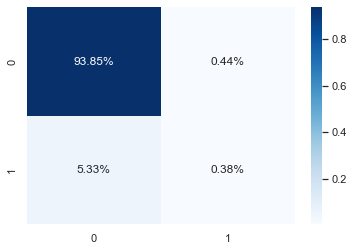

In [324]:
import seaborn as sns
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

<AxesSubplot:>

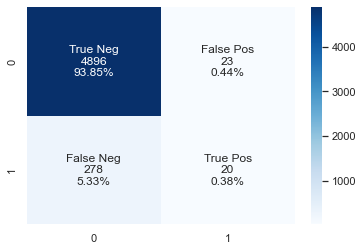

In [325]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

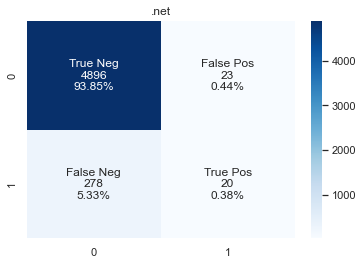

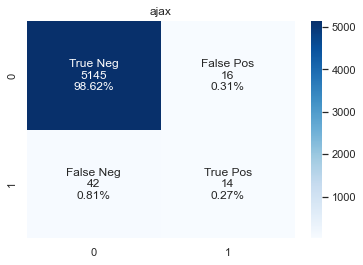

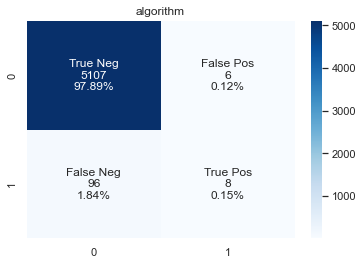

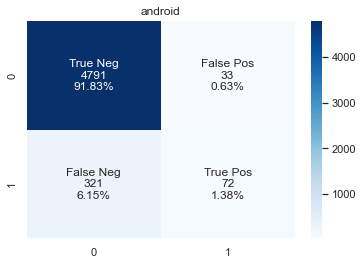

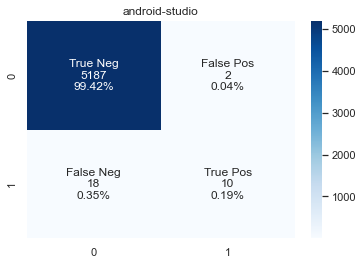

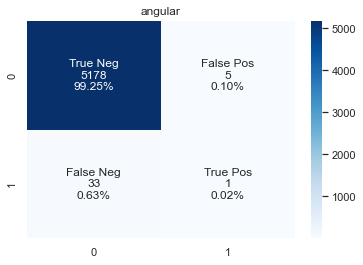

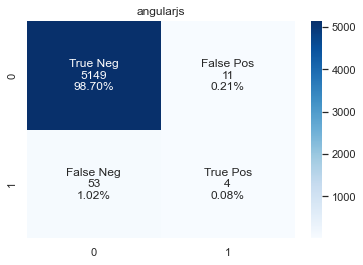

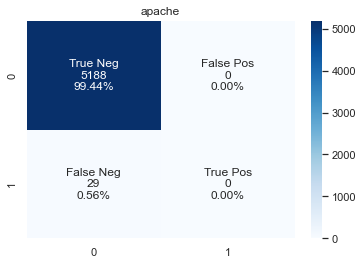

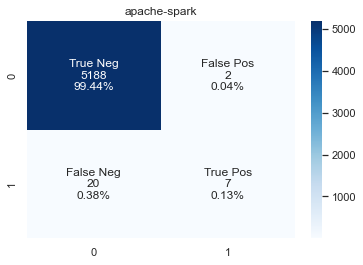

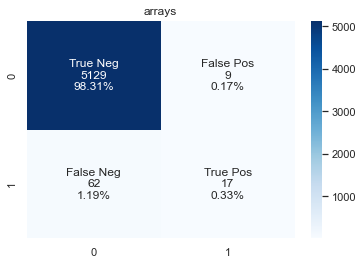

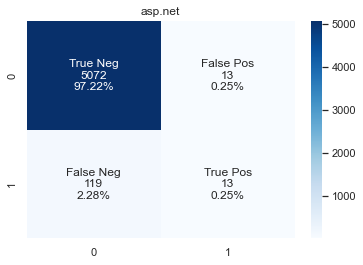

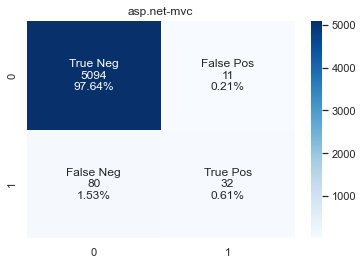

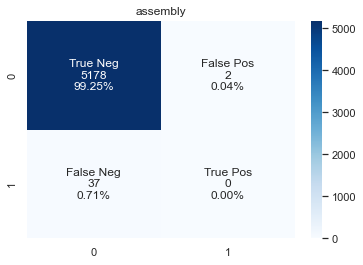

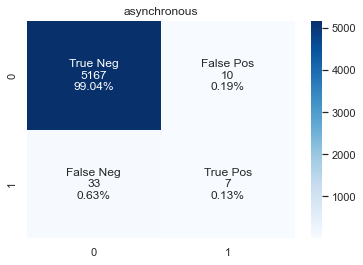

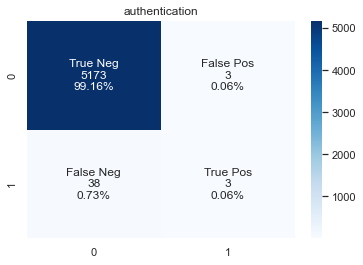

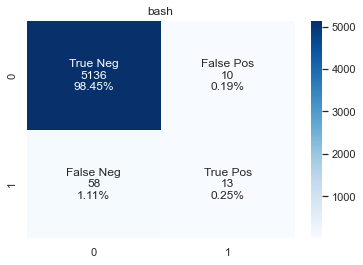

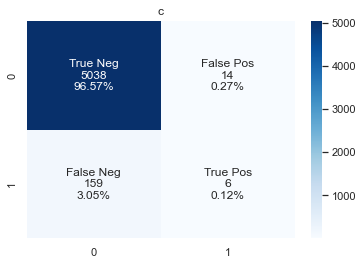

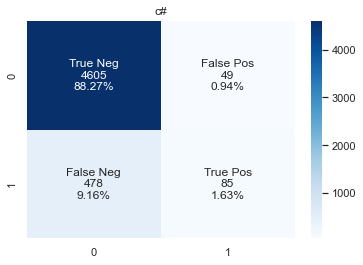

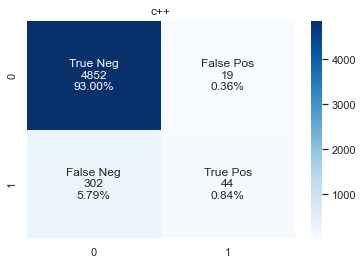

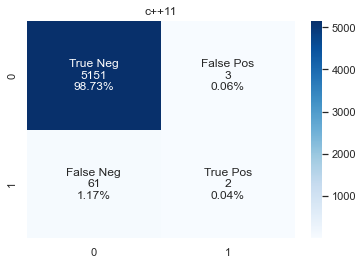

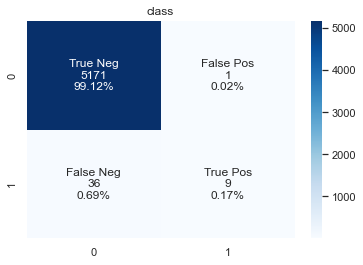

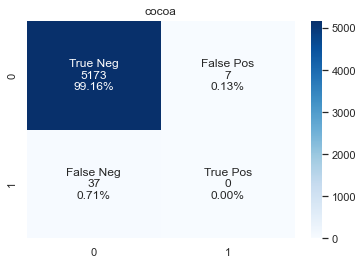

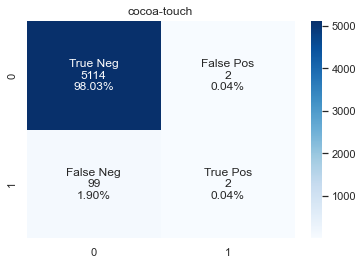

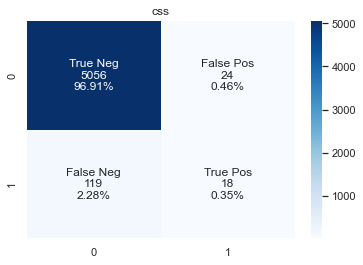

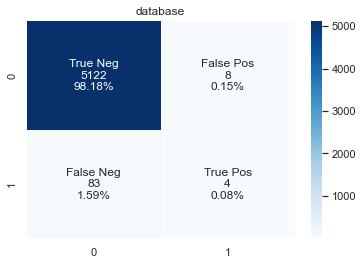

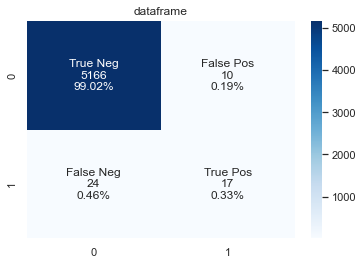

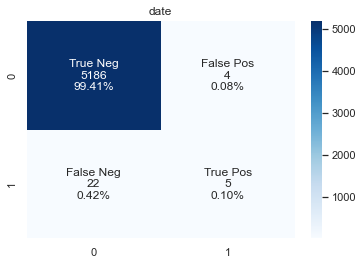

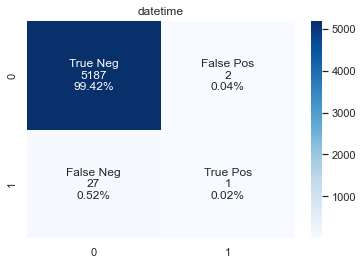

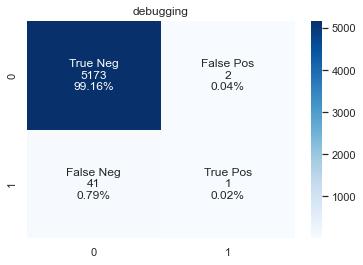

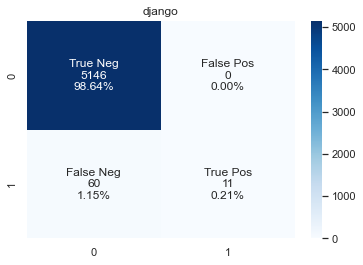

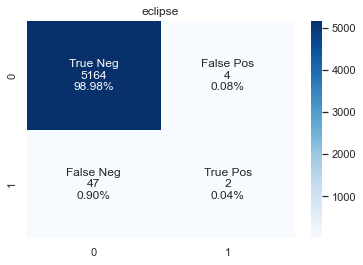

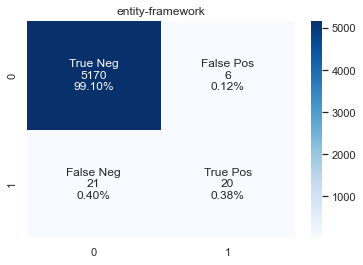

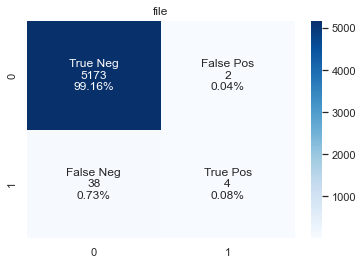

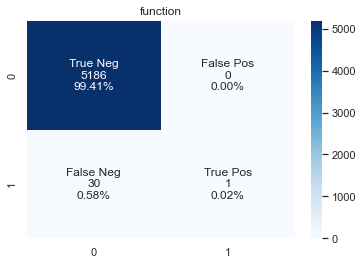

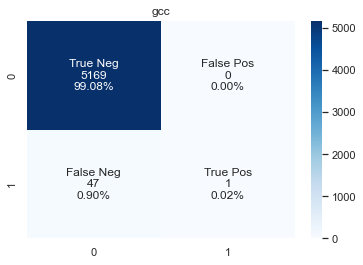

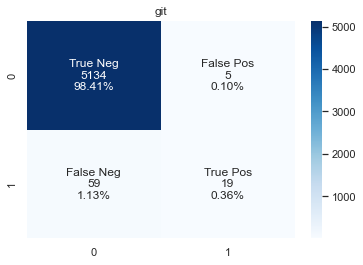

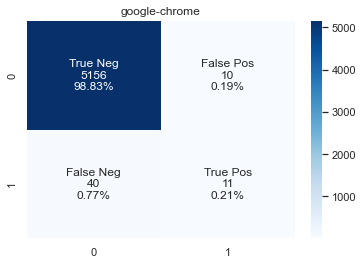

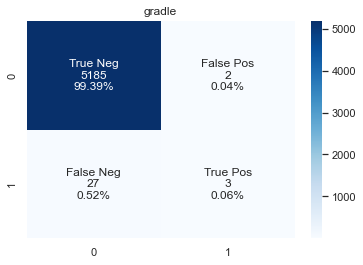

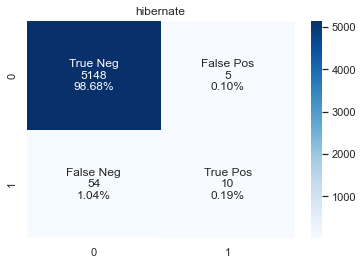

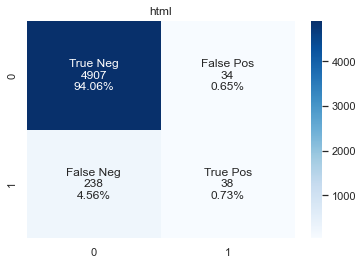

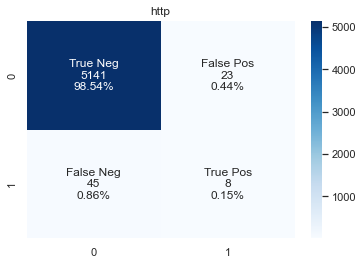

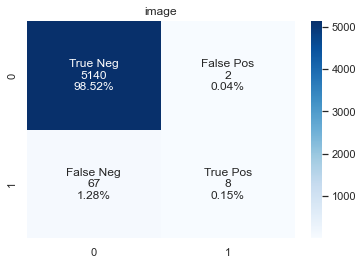

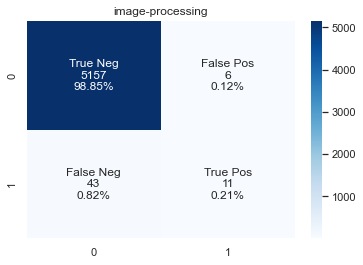

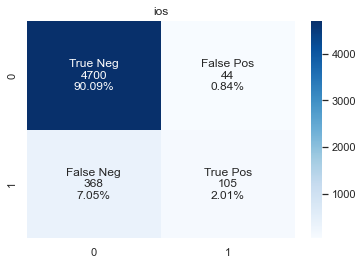

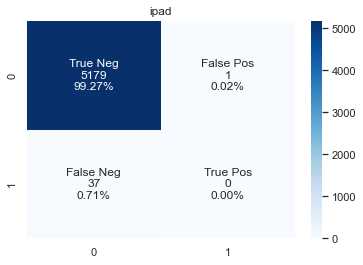

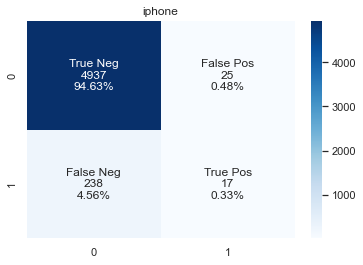

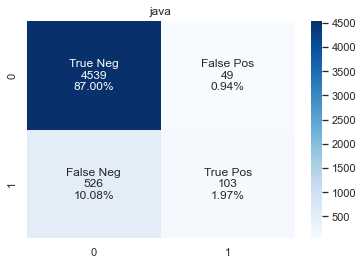

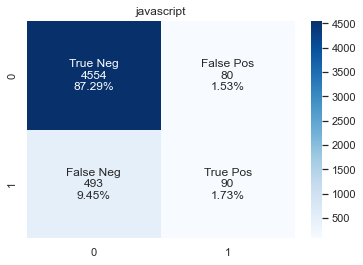

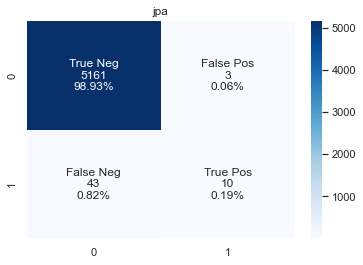

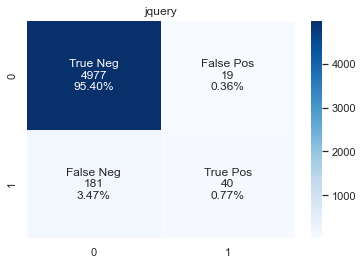

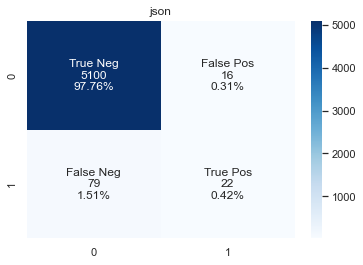

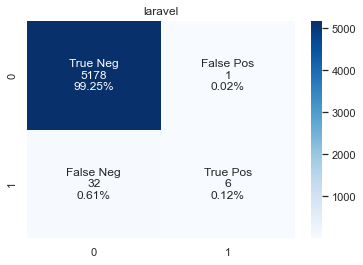

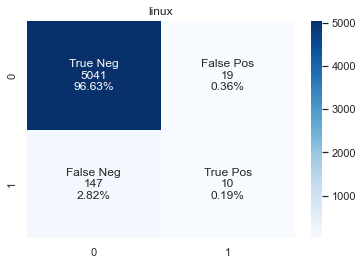

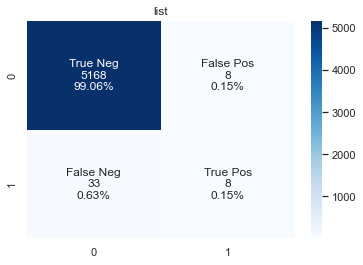

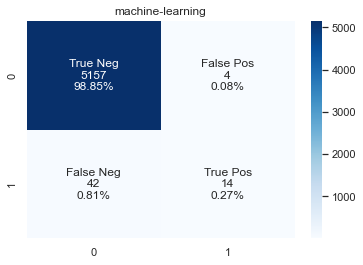

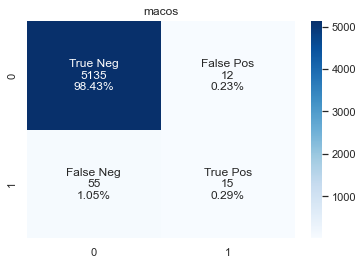

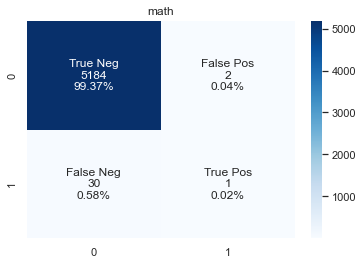

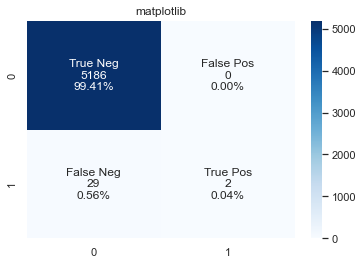

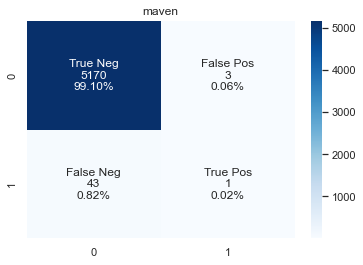

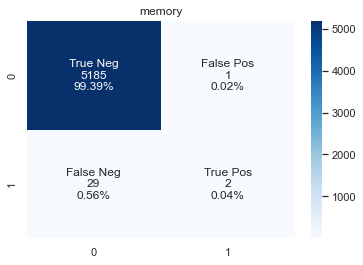

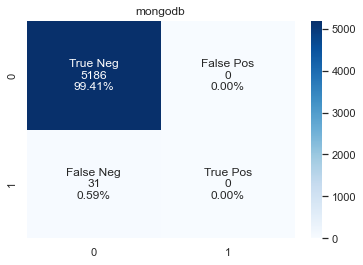

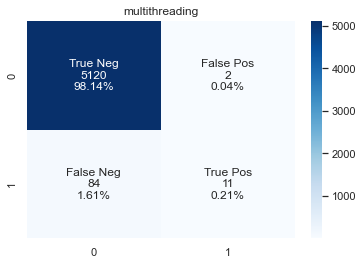

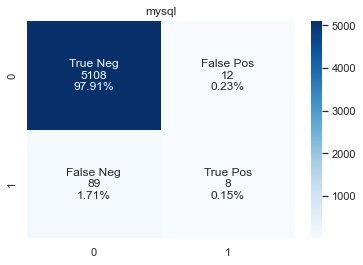

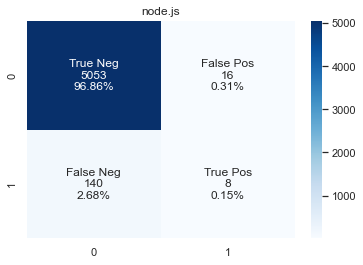

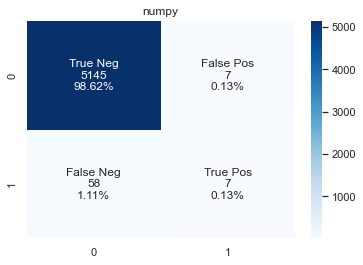

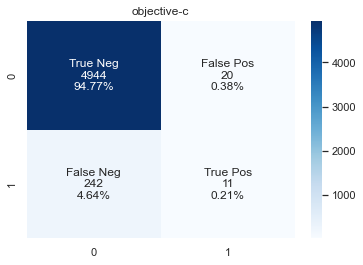

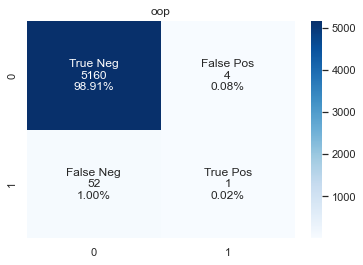

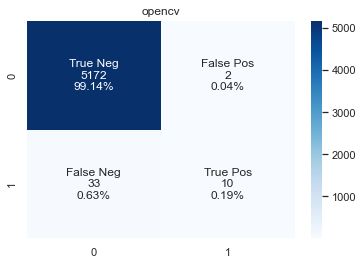

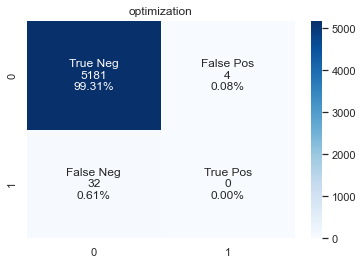

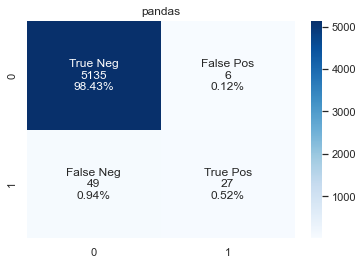

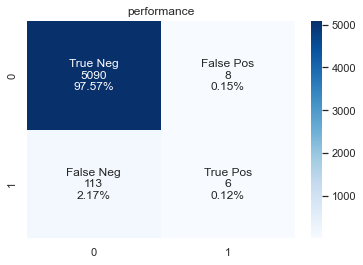

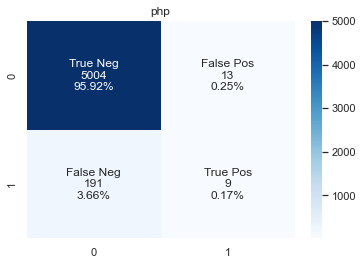

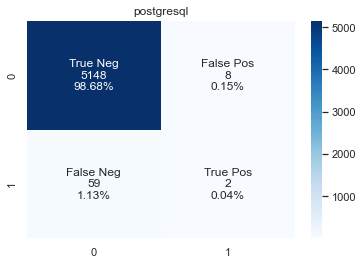

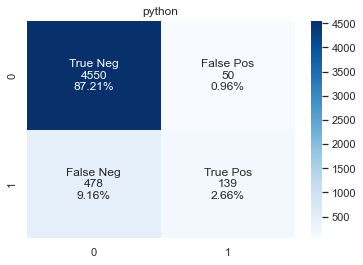

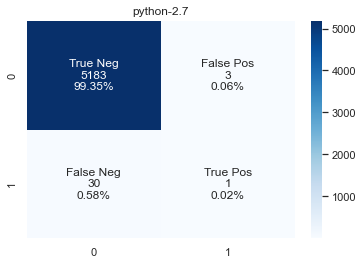

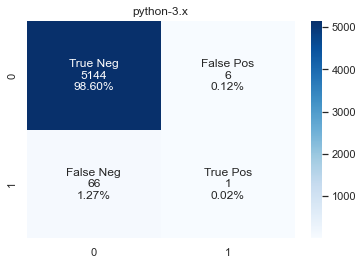

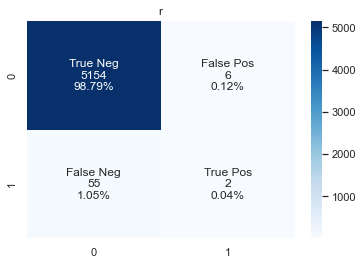

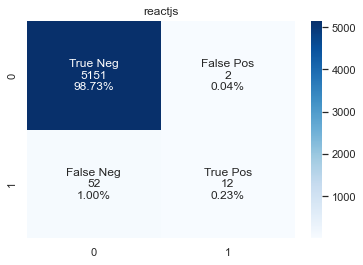

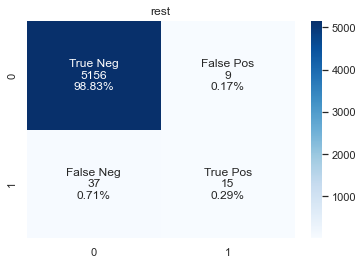

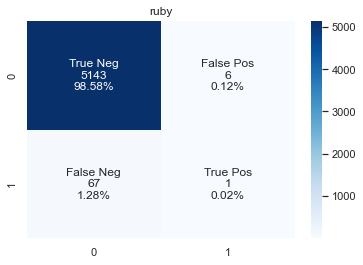

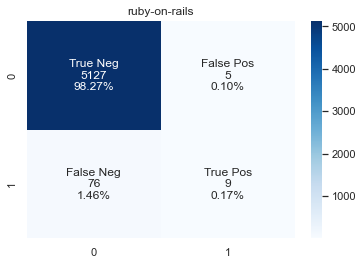

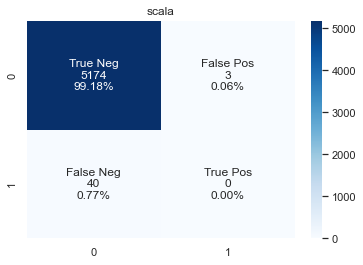

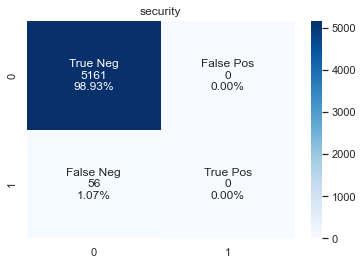

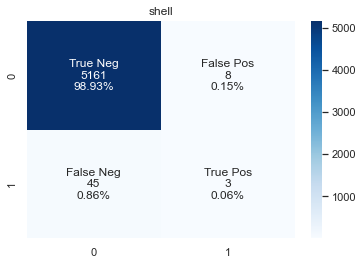

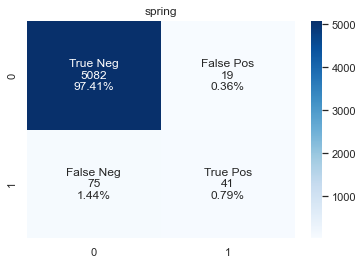

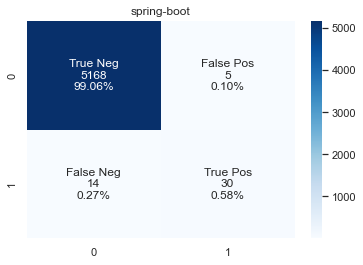

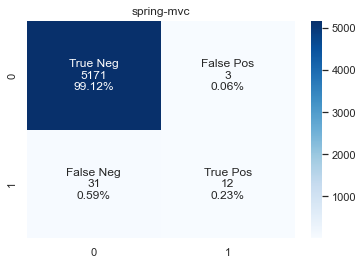

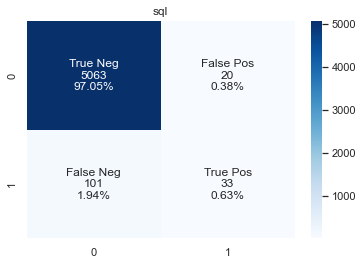

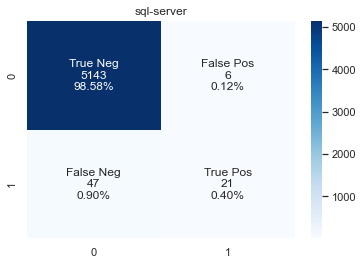

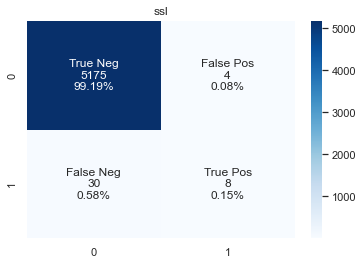

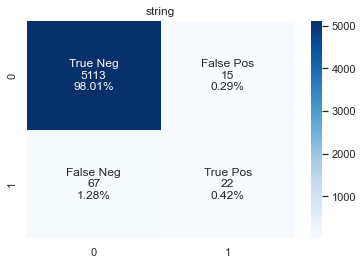

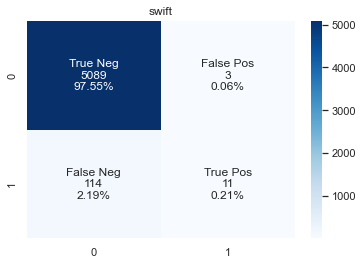

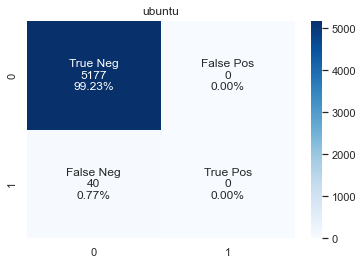

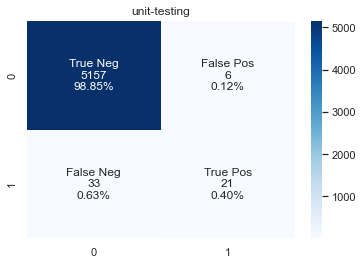

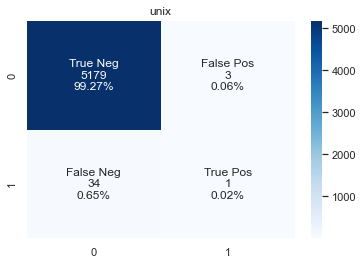

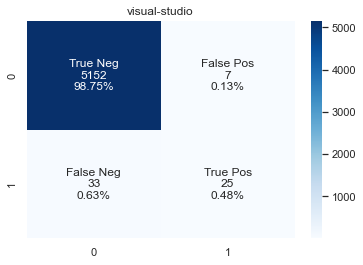

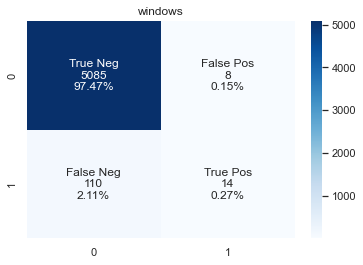

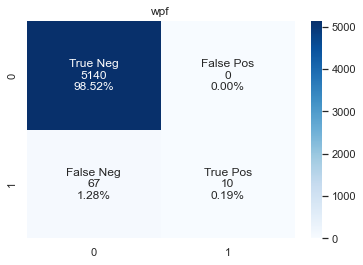

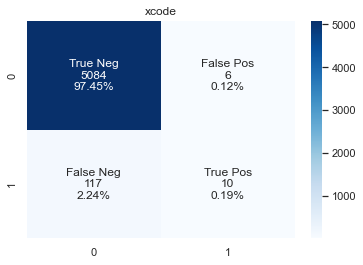

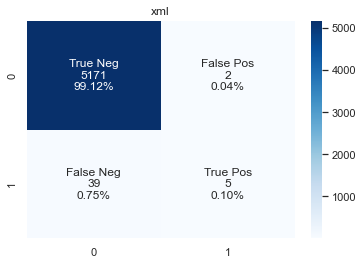

In [327]:
for i in range(y_train.shape[1]):
    cf_matrix = confusion_matrix(y_test[:,i], y_pred[:,i])
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(i)
    plt.title(multilabel_binarizer.classes_[i])
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
    print("")

FEATURES IMPORTANCE

SUGGESSTION D'UN TAG POUR TESTER